In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
df= pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# check the shape of the dataframe
df.shape

(9240, 37)

In [6]:
# looking at the statistical aspects of the dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# let's see the types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Step2: Data Cleaning, Manipulation

In [8]:
# Checking the null values
df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

Dropping the columns which are not useful and have many null values

In [9]:
for x in df.columns:
    if df[x].isnull().sum()>3000:
        print(x , "has the null values: " , df[x].isnull().sum())
        df.drop(x , 1 , inplace=True)
        print("Dropped" , x)

Tags has the null values:  3353
Dropped Tags
Lead Quality has the null values:  4767
Dropped Lead Quality
Asymmetrique Activity Index has the null values:  4218
Dropped Asymmetrique Activity Index
Asymmetrique Profile Index has the null values:  4218
Dropped Asymmetrique Profile Index
Asymmetrique Activity Score has the null values:  4218
Dropped Asymmetrique Activity Score
Asymmetrique Profile Score has the null values:  4218
Dropped Asymmetrique Profile Score


In [10]:
# checking the null values
df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

In [11]:
# Checking the percentage of missing values:
miss_values = round(100*(df.isnull().sum()/len(df)),2)
print(miss_values.sort_values())

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origi

In [12]:
df.drop(["Lead Number" , "Prospect ID"] , axis= 1 , inplace = True)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   
2             Email Opened   India  ...                    No   
3              Unreachable   India  ...                    No   
4        Converted to Lead   India  ...                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City I agree to pay the amount through cheque  \
0  Select                                       No   
1  Select                                       No   
2  Mumbai                                       No   
3  Mumbai                                       No   
4  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 29 columns]

In [13]:
df.shape

(9240, 29)

In [14]:
# Lets check null values again:
df.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
A free copy of Mastering The Interview              0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity                               0
Lead Source                 

Handling the 'Select' Level that is present in many of the Categorical Variables:

In [15]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [16]:
# Checking the null values
df.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [17]:
#Checking for NULL/MISSING values:  percentage of missing values in each column 
null_valuep_col = round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)
null_valuep_col

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [18]:
null_col=df.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values>(len(df)*0)]

We see that for some columns we have High Percentage of Missing Values. We can drop the columns with missing values greater than 45% .

In [19]:
#Dropping all columns having Null values greater than 45 %
colms=df.columns

for i in colms:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [20]:
#checking null values percentage AFTER dropping columns with high percentage(>45%) missing values.

round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

In [21]:
cont_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].nunique()>30:
        print(i,df[i].nunique(),  "----cont_cols")
        cont_cols.append(i)
    else:
        print(i,df[i].nunique(),  "----cat_cols")
        cat_cols.append(i)

Lead Origin 5 ----cat_cols
Lead Source 21 ----cat_cols
Do Not Email 2 ----cat_cols
Do Not Call 2 ----cat_cols
Converted 2 ----cat_cols
TotalVisits 41 ----cont_cols
Total Time Spent on Website 1731 ----cont_cols
Page Views Per Visit 114 ----cont_cols
Last Activity 17 ----cat_cols
Country 38 ----cont_cols
Specialization 18 ----cat_cols
What is your current occupation 6 ----cat_cols
What matters most to you in choosing a course 3 ----cat_cols
Search 2 ----cat_cols
Magazine 1 ----cat_cols
Newspaper Article 2 ----cat_cols
X Education Forums 2 ----cat_cols
Newspaper 2 ----cat_cols
Digital Advertisement 2 ----cat_cols
Through Recommendations 2 ----cat_cols
Receive More Updates About Our Courses 1 ----cat_cols
Update me on Supply Chain Content 1 ----cat_cols
Get updates on DM Content 1 ----cat_cols
City 6 ----cat_cols
I agree to pay the amount through cheque 1 ----cat_cols
A free copy of Mastering The Interview 2 ----cat_cols
Last Notable Activity 16 ----cat_cols


In [22]:
cont_cols=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',  
          'What is your current occupation', 'What matters most to you in choosing a course', 
          'Search','Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','Last Notable Activity','Specialization','City']

In [24]:
# Replacing the null values in categorical columns by mode of that respective the colmun
for i in cat_cols:
    if df[i].isnull().sum()>0:
        value=df[i].mode()[0]
        df[i]=df[i].fillna(value)

In [25]:
# Replacing the null values in continuous columns by median of that respective the colmun
for i in cont_cols:
    if df[i].isnull().sum()>0:   
        value=df[i].median()
        df[i]=df[i].fillna(value)

In [27]:
#now check all the null values are replaced or not
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [28]:
df = df.drop(['Country','What matters most to you in choosing a course','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [29]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [30]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

converting some binary variables (Yes/No) to 0/1

In [31]:
print(df["Do Not Email"].value_counts())
print(df["A free copy of Mastering The Interview"].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [32]:
# Replacing the values of yes =1 and No= 0
df["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
df["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
df["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
df["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)


#### step 3: Outlier Analysis

In [33]:
# Checking the data at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.438636                   487.698268   
std        0.270435     0.486714     4.819024                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
90%        0.000000     1.000000     7.000000                  1380.000000   
95%        1.000000     1.000000    10.000000                  1562.000000   
99%        1.000000     1.000000    17.000000                  1840.610000   
max        1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.357440                                0.312554  
std                2.145781                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               55.000000                                1.000000

it can be clearly seen that outliers is there in the columns TotalVisits and Page Views Per Visit columns

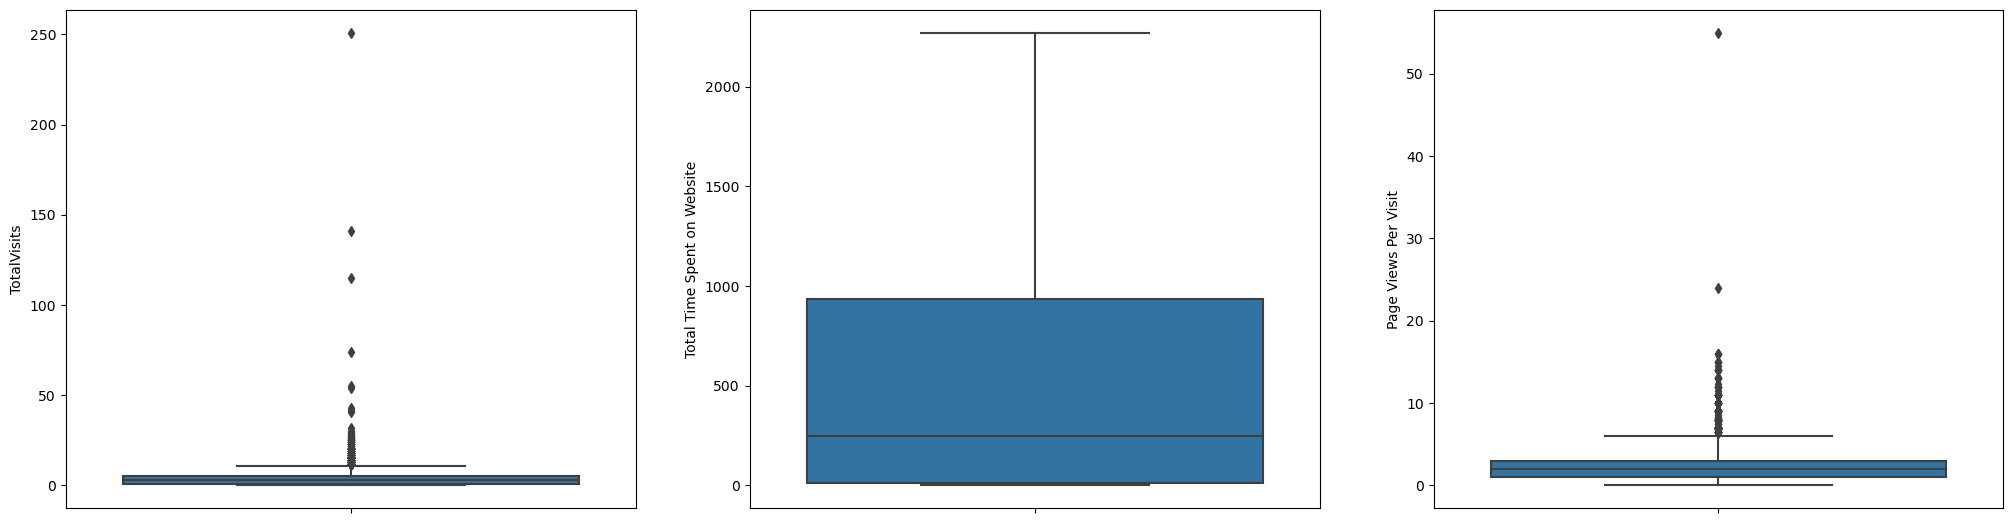

In [34]:
# Check the outliers for all the numeric columns

plt.figure(figsize=(25, 22))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = df)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

In [35]:
# Removing values beyond 99% for Total Visits

total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < total_visits]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [36]:
# Removing values beyond 99% for page Views Per Visit

page_visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < page_visits]
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [37]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9029.000000  9029.000000  9029.000000                  9029.000000   
mean       0.077749     0.385092     3.087164                   483.133016   
std        0.267792     0.486644     2.801244                   547.420675   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                     7.000000   
50%        0.000000     0.000000     3.000000                   245.000000   
75%        0.000000     1.000000     4.000000                   929.000000   
90%        0.000000     1.000000     7.000000                  1378.000000   
95%        1.000000     1.000000     8.000000                  1558.000000   
99%        1.000000     1.000000    13.000000                  1839.720000   
max        1.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9029.000000                             9029.000000  
mean               2.226383                                0.305682  
std                1.823395                                0.460721  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                7.000000                                1.000000  
max                8.000000                                1.000000

#### Step 4: Visualising data

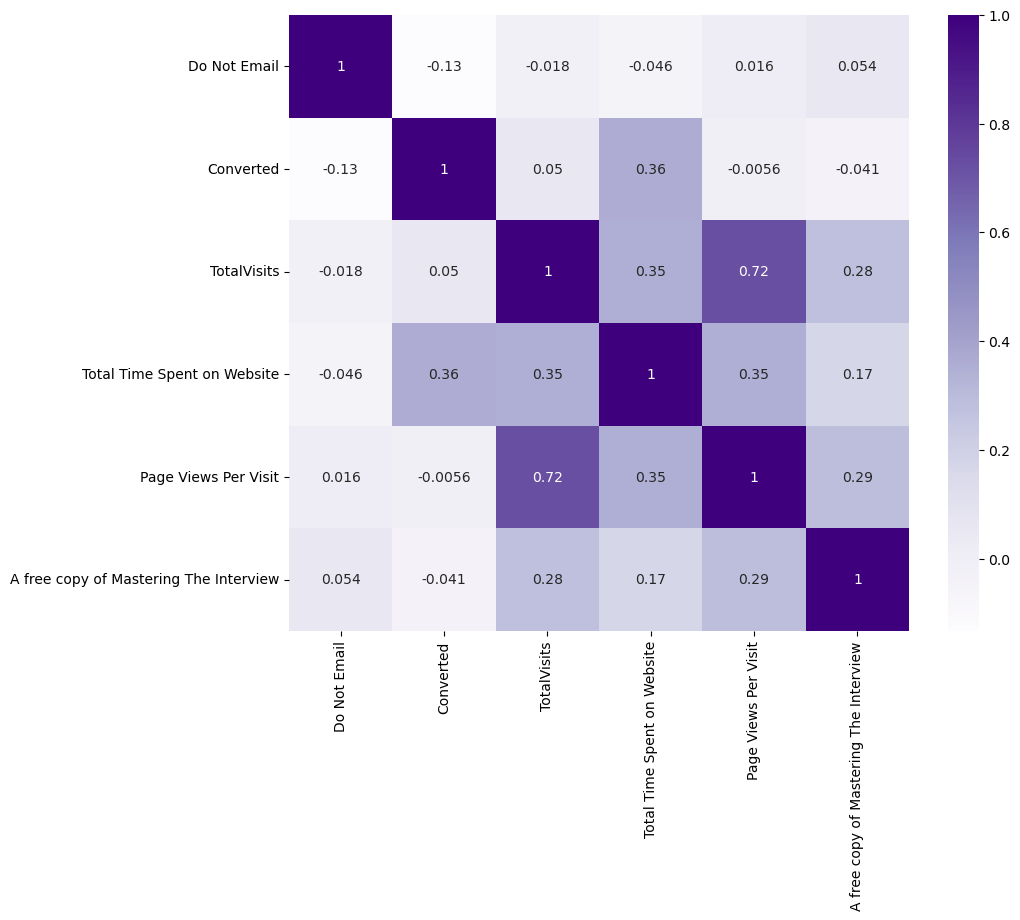

In [38]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(df.corr(), cmap="Purples", annot=True)
plt.show()

In [39]:
cat_col1=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']

(0, 'Lead Origin')
(1, 'Lead Source')
(2, 'Last Activity')
(3, 'What is your current occupation')


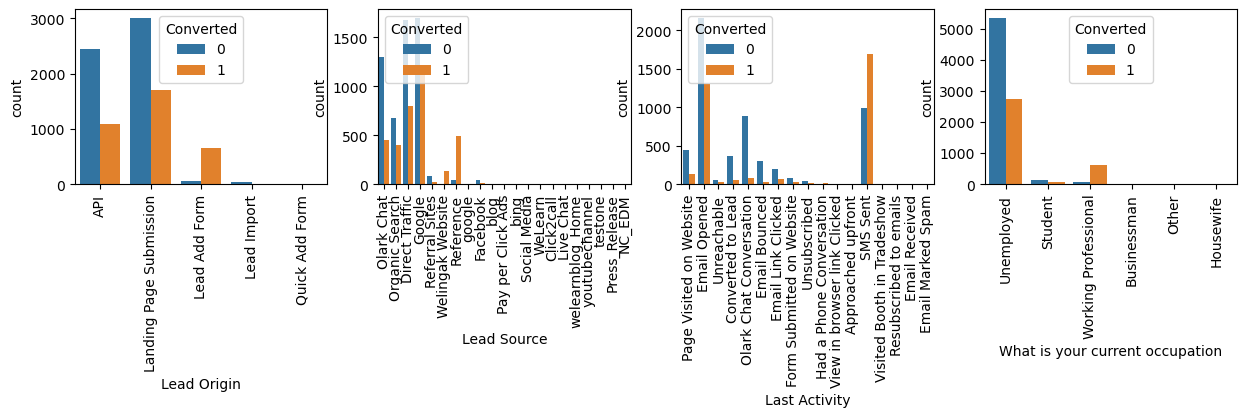

In [40]:
plt.figure(figsize = (15, 5))
for i in enumerate(cat_col1):
    plt.subplot(2,4,i[0]+1)
    print(i)
    sns.countplot(i[1], hue = 'Converted', data = df)
    plt.xticks(rotation = 90)

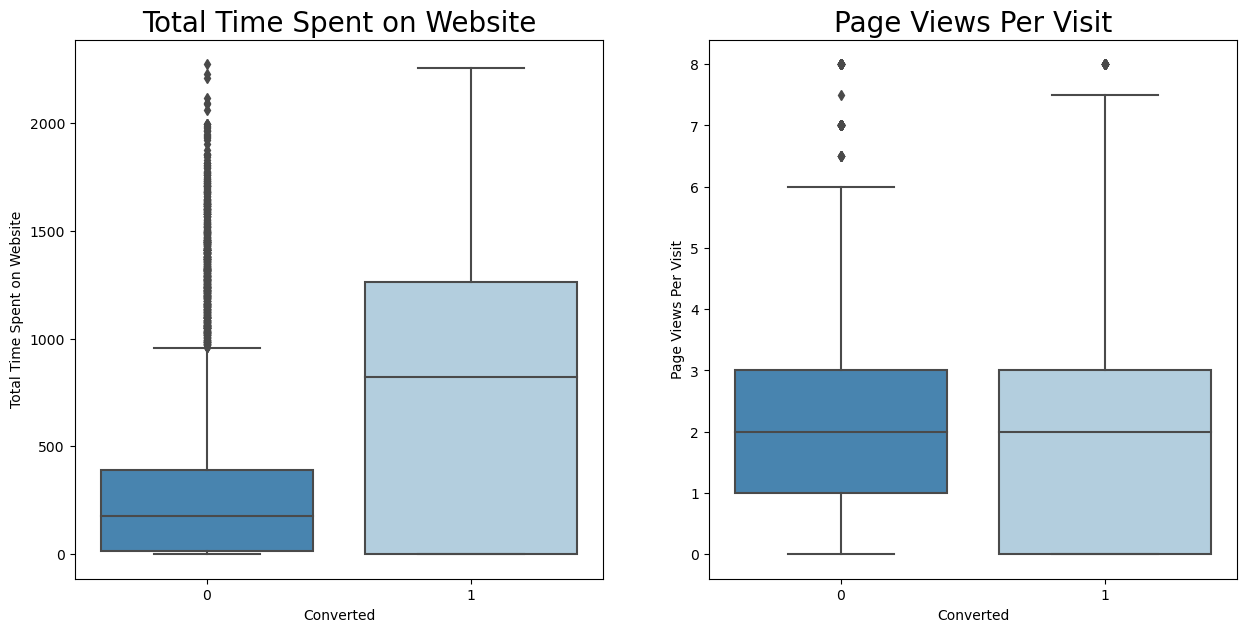

In [41]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(df["Converted"] , df["Total Time Spent on Website"] , palette = "Blues_r")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 20, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(df["Converted"] , df["Page Views Per Visit"] , palette = "Blues_r")
plt.title("Page Views Per Visit", fontdict={'fontsize': 20, 'color' : 'black'})

plt.show()

Univariate Analysis - Categorical Variables

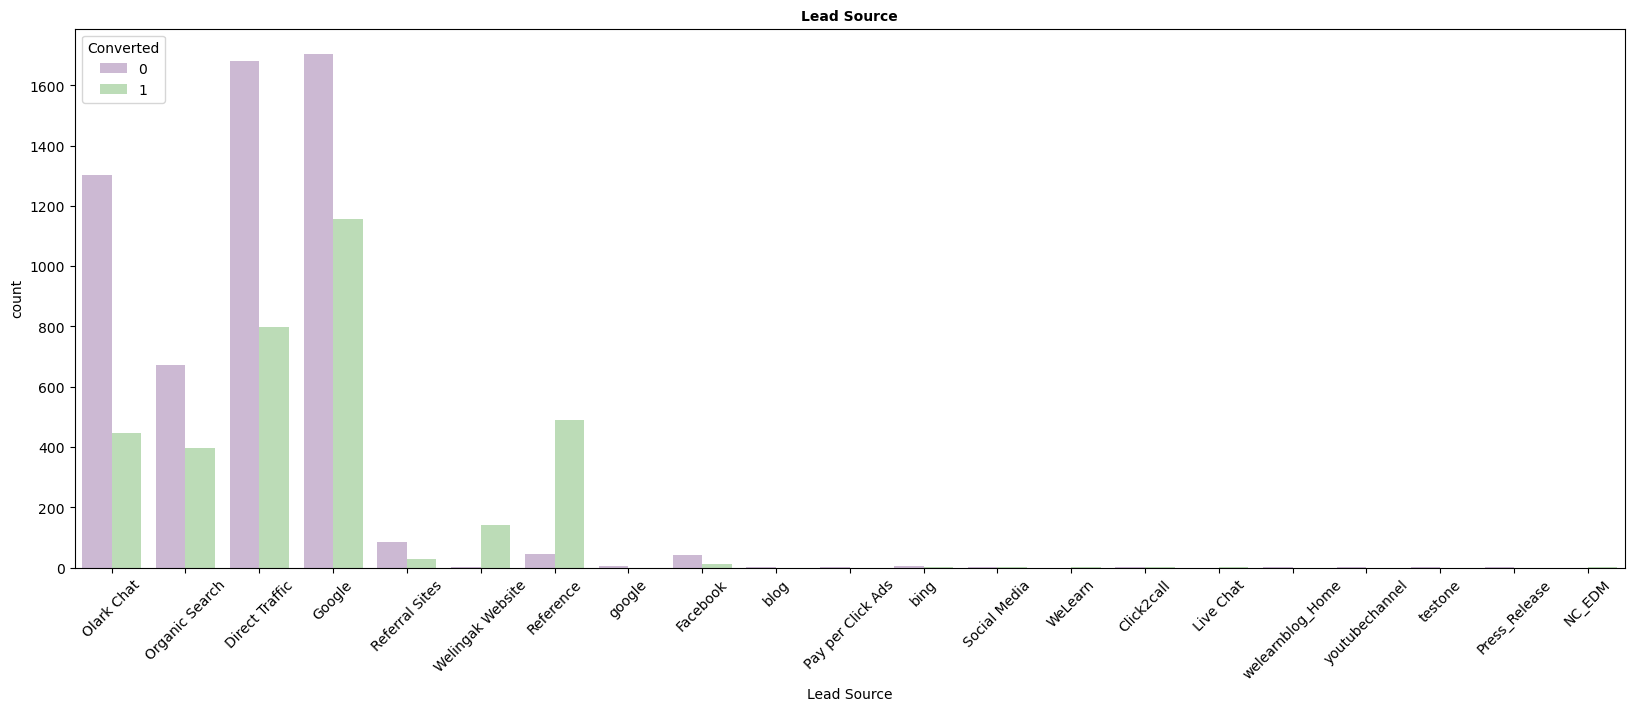

In [42]:
plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df['Lead Source'], hue = df.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

Finding- Google has the highest conversion rate.

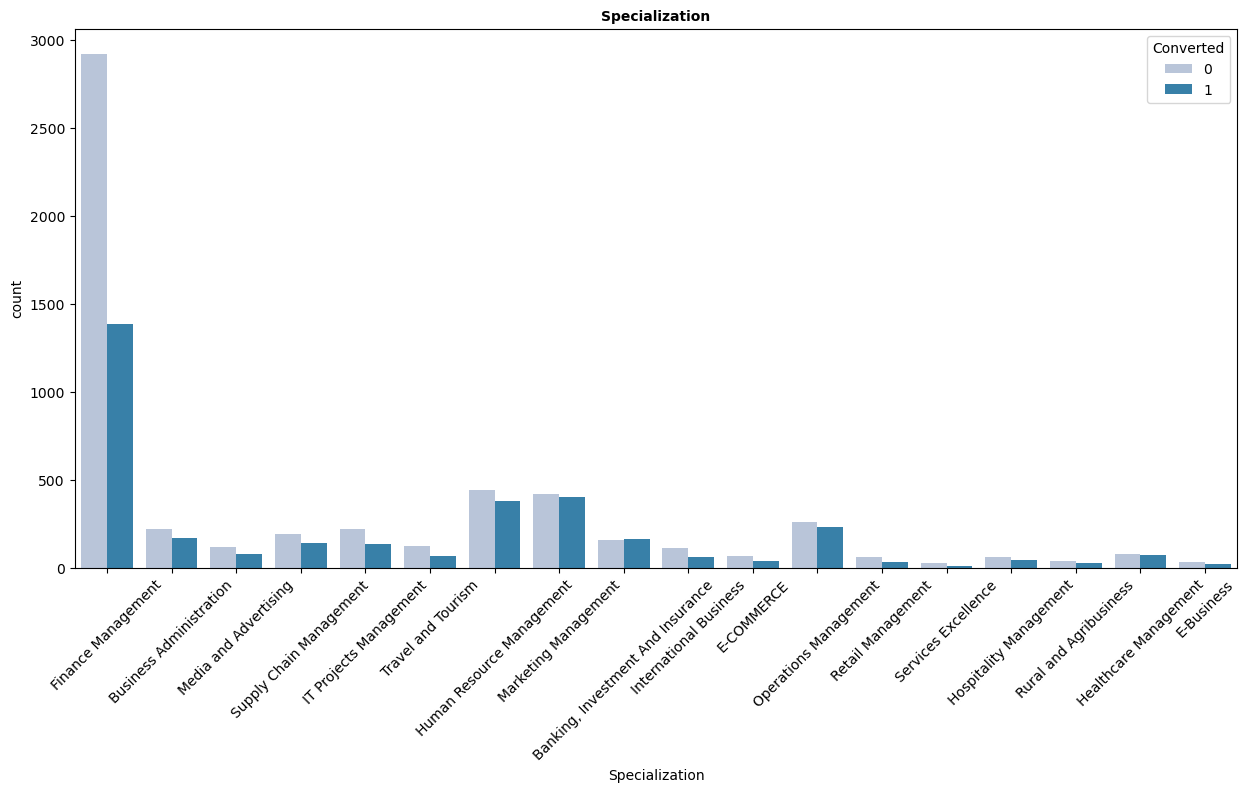

In [43]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(df['Specialization'], hue = df.Converted, palette = "PuBu")
plt.title('Specialization', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)


plt.show()

Finding- Lead from Specialization who are unknown/Select columns has the highest rate of conversion.

#### Step 5: Data Preparation for Modelling

Dummy creation

Splitting the Data into Training and Testing Sets

Scaling The Features

In [46]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [48]:
df=df.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [49]:
df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [51]:
df.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.132879   
Converted                                              -0.132879   1.000000   
TotalVisits                                            -0.018485   0.050210   
Total Time Spent on Website                            -0.045955   0.359630   
Page Views Per Visit                                    0.016326  -0.005636   
...                                                          ...        ...   
Last Notable Activity_Resubscribed to emails           -0.003056   0.013299   
Last Notable Activity_SMS Sent                         -0.024659   0.355810   
Last Notable Activity_Unreachable                      -0.009972   0.039152   
Last Notable Activity_Unsubscribed                      0.246459  -0.015071   
Last Notable Activity_View in browser link Clicked     -0.003056  -0.008329   

                                                    TotalVisits  \
Do Not Email                                          -0.018485   
Converted                                              0.050210   
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.353603   
Page Views Per Visit                                   0.723836   
...                                                         ...   
Last Notable Activity_Resubscribed to emails          -0.011599   
Last Notable Activity_SMS Sent                         0.017771   
Last Notable Activity_Unreachable                      0.013721   
Last Notable Activity_Unsubscribed                     0.006104   
Last Notable Activity_View in browser link Clicked     0.018459   

                                                    Total Time Spent on Website  \
Do Not Email                                                          -0.045955   
Converted                                                              0.359630   
TotalVisits                                                            0.353603   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.350819   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009289   
Last Notable Activity_SMS Sent                                         0.125829   
Last Notable Activity_Unreachable                                      0.010733   
Last Notable Activity_Unsubscribed                                     0.001878   
Last Notable Activity_View in browser link Clicked                    -0.007578   

                                                    Page Views Per Visit  \
Do Not Email                                                    0.016326   
Converted                                                      -0.005636   
TotalVisits                                                     0.723836   
Total Time Spent on Website                                     0.350819   
Page Views Per Visit                                            1.000000   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.012851   
Last Notable Activity_SMS Sent                                  0.066744   
Last Notable Activity_Unreachable                               0.021176   
Last Notable Activity_Unsubscribed                              0.018844   
Last Notable Activity_View in browser link Clicked              0.002561   

                                                    A free copy of Mastering The Interview  \
Do Not Email                                                                      0.054237   
Converted                                                                        -0.040934   
TotalVisits                                                                       0.276740   
Total Time S

Splitting the data into training and Splitting sets

In [52]:
# Putting feature variable to X
X = df.drop(['Converted'], axis = 1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   What is your current occupation_Housewife  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                             

In [53]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42 )

In [55]:
X_train.shape, X_test.shape

((6320, 87), (2709, 87))

Feature scaling using Minmax scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
2240             0       0.1875                     0.898963   
113              0       0.3125                     0.706360   
4132             0       0.3750                     0.768155   
5573             0       0.1250                     0.028868   
1109             0       0.0625                     0.009021   

      Page Views Per Visit  A free copy of Mastering The Interview  \
2240                 0.375                                       0   
113                  0.625                                       0   
4132                 0.750                                       1   
5573                 0.250                                       1   
1109                 0.125                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2240                                    1                          0   
113                                     0                          0   
4132                                    1                          0   
5573                                    1                          0   
1109                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
2240                        0                           0   
113                         0                           0   
4132                        0                           0   
5573                        0                           0   
1109                        0                           0   

      What is your current occupation_Housewife  ...  \
2240                                          0  ...   
113                                           0  ...   
4132                                          0  ...   
5573                                          0  ...   
1109                                          0  ...   

      Last Notable Activity_Form Submitted on Website  \
2240                                                0   
113                                                 0   
4132                                                0   
5573                                                0   
1109                                                0   

      Last Notable Activity_Had a Phone Conversation  \
2240                                               0   
113                                                0   
4132                                               0   
5573                                               0   
1109                                               0   

      Last Notable Activity_Modified  \
2240                               0   
113                                1   
4132                               1   
5573                               0   
1109                               1   

      Last Notable Activity_Olark Chat Conversation  \
2240                                              0   
113                                               0   
4132                                              0   
5573                                              0   
1109                                              0   

      Last Notable Activity_Page Visited on Website  \
2240                                              0   
113                                               0   
4132                                              0   
5573                                              0   
1109                                              0   

      Last Notable Activity_Resubscribed to emails  \
2240                                             0   
113                                              0   
4132                                             0   
5573                                             0   
1109                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
2240                               0                                  0   
113  

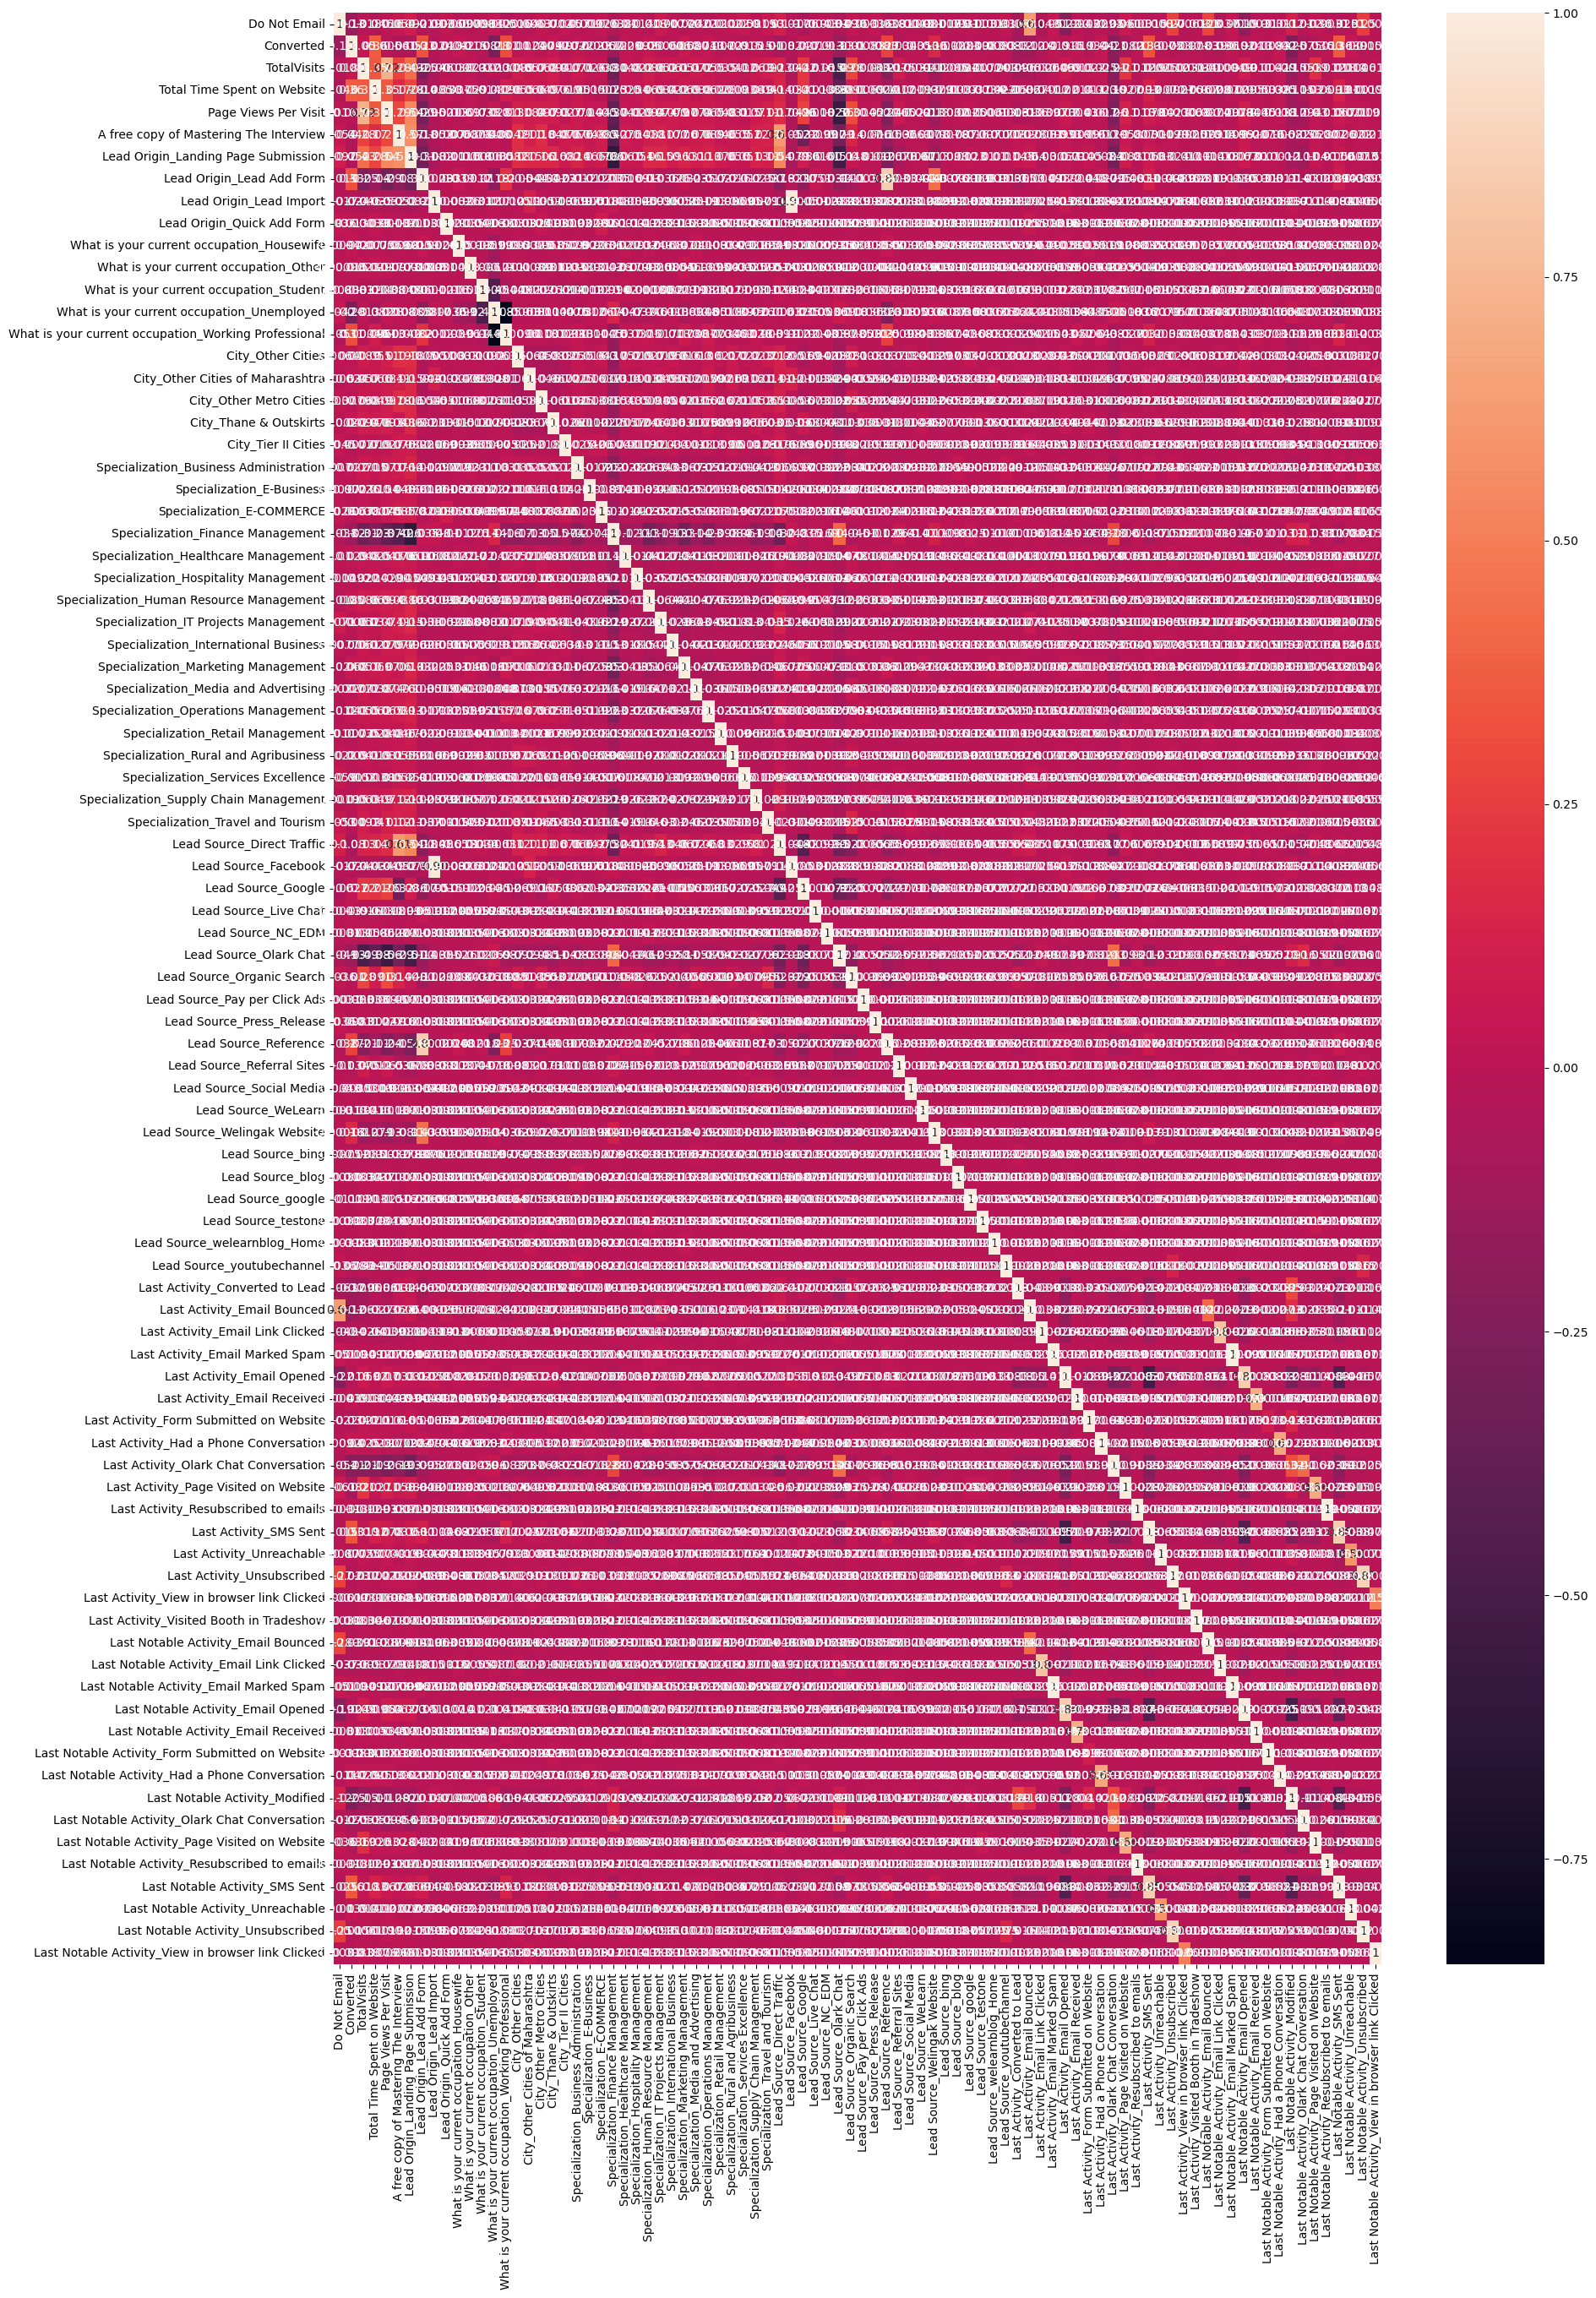

In [58]:

# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### step 6: Model Building

Now we will move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [59]:
import statsmodels.api as sm

In [60]:
# Logistic regression model with StatsModels
X_train=sm.add_constant(X_train)
lgm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 07 Sep 2023   Deviance:                   1.3042e+05
Time:                        01:30:41   Pearson chi2:                 6.38e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 8.641e+15   6.16e+07    1.4e+08      0.000    8.64e+15    8.64e+15
Do Not Email                                         -4.098e+14   4.49e+06  -9.12e+07      0.000    -4.1e+14    -4.1e+14
TotalVisits                                          -2.531e+13   7.64e+06  -3.31e+06      0.000   -2.53e+13   -2.53e+13
Total Time Spent on Website                           9.326e+13   3.96e+06   2.35e+07      0.000    9.33e+13    9.33e+13
Page Views Per Visit                                  3.354e+14   6.52e+06   5.14e+07      0.000    3.35e+14    3.35e+14
A free copy of Mastering The Interview                1.057e+14   2.73e+06   3.87e+07      0.000    1.06e+14    1.06e+14
Lead Origin_Landing Page Submission                  -1.068e+14   3.01e+06  -3.54e+07      0.000   -1.07e+14   -1.07e+14
Lead Origin_Lead Add Form                             6.066e+14   1.32e+07   4.58e+07      0.000    6.07e+14    6.07e+14
Lead Origin_Lead Import                               4.659e+14   4.79e+07   9.72e+06      0.000    4.66e+14    4.66e+14
Lead Origin_Quick Add Form                             5.13e+15   6.81e+07   7.53e+07      0.000    5.13e+15    5.13e+15
What is your current occupation_Housewife             3.484e+15   4.13e+07   8.44e+07      0.000    3.48e+15    3.48e+15
What is your current occupation_Other                 9.113e+14   3.89e+07   2.34e+07      0.000    9.11e+14    9.11e+14
What is your current occupation_Student              -6.858e+14   3.42e+07  -2.01e+07      0.000   -6.86e+14   -6.86e+14
What is your current occupation_Unemployed           -7.854e+14   3.37e+07  -2.33e+07      0.000   -7.85e+14   -7.85e+14
What is your current occupation_Working Professional  3.498e+14   3.39e+07   1.03e+07      0.000     3.5e+14     3.5e+14
City_Other Cities                                    -5.321e+13   3.48e+06  -1.53e+07      0.000   -5.32e+13   -5.32e+13
City_Other Cities of Maharashtra                      1.098e+14   4.09e+06   2.68e+07      0.000     1.1e+14     1.1e+14
City_Other Metro Cities                               1.026e+14   4.58e+06   2.24e+07      0.000    1.03e+14    1.03e+14
City_Thane & Outskirts                                7.023e+13   3.26e+06   2.15e+07      0.000    7.02e+13    7.02e+13
City_Tier II Cities                                   1.315e+14   9.53e+06   1.38e+07      0.000    1.31e+14    1.31e+14
Specialization_Business Administration               -1.096e+14   6.21e+06  -1.77e+07      0.000    -1.1e+14    -1.1e+14
Specialization_E-Business                             -4.23e+14   1.21e+07  -3.49e+07      0.000   -4.23e+14   -4.23e+14
Specialization_E-COMMERCE                             2.21

In [61]:
#RFE - Selecting 15 Variables using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
# Top 15 Features Selected by RFE for Modelling are:
rfe.support_

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 66),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 65),
 ('Lead Origin_Quick Add Form', False, 13),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 44),
 ('What is your current occupation_Student', False, 4),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 32),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 34),
 ('City_Thane & Outskirts', False, 35),
 ('City_Tier II Cities', False, 49),
 ('Specialization_Business Administration', False, 59),
 ('Specialization_E-Business', False, 26),
 ('Special

In [64]:
# list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
# list of rfe not supported columns
X_train.columns[~rfe.support_]

Index(['const', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_O

In [66]:
# Dataset of columns selected by RFE are:
X_train[col].head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
2240             0       0.1875                     0.898963   
113              0       0.3125                     0.706360   
4132             0       0.3750                     0.768155   
5573             0       0.1250                     0.028868   
1109             0       0.0625                     0.009021   

      Lead Origin_Lead Add Form  What is your current occupation_Housewife  \
2240                          0                                          0   
113                           0                                          0   
4132                          0                                          0   
5573                          0                                          0   
1109                          0                                          0   

      What is your current occupation_Working Professional  \
2240                                                  0      
113                                                   0      
4132                                                  0      
5573                                                  0      
1109                                                  0      

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
2240                       0                             0   
113                        0                             0   
4132                       0                             0   
5573                       0                             0   
1109                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
2240                                0                            0   
113                                 1                            0   
4132                                0                            0   
5573                                0                            0   
1109                                1                            0   

      Last Activity_Olark Chat Conversation  \
2240                                      0   
113                                       0   
4132                                      0   
5573                                      0   
1109                                      0   

      Last Notable Activity_Email Bounced  \
2240                                    0   
113                                     0   
4132                                    0   
5573                                    0   
1109                                    0   

      Last Notable Activity_Had a Phone Conversation  \
2240                                               0   
113                                                0   
4132                                               0   
5573                                               0   
1109                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
2240                               0                                  0  
113                                0                                  0  
4132                               0                                  0  
5573                               0                                  0  
1109                               0                                  0

In [67]:
# BUILDING MODEL-1
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lm1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.6
Date:                Thu, 07 Sep 2023   Deviance:                       5235.1
Time:                        01:31:45   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6395      0.100    -26.267      0.000      -2.836      -2.443
Do Not Email                                            -1.1351      0.189     -6.005      0.000      -1.506      -0.765
TotalVisits                                              1.1460      0.244      4.689      0.000       0.667       1.625
Total Time Spent on Website                              4.4576      0.164     27.177      0.000       4.136       4.779
Lead Origin_Lead Add Form                                4.0242      0.205     19.619      0.000       3.622       4.426
What is your current occupation_Housewife               23.0907   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
What is your current occupation_Working Professional     2.9238      0.202     14.452      0.000       2.527       3.320
Lead Source_Olark Chat                                   1.4593      0.121     12.065      0.000       1.222       1.696
Lead Source_Welingak Website                             2.1661      0.744      2.912      0.004       0.708       3.624
Last Activity_Converted to Lead                         -0.9907      0.214     -4.638      0.000      -1.409      -0.572
Last Activity_Email Bounced                             -1.6628      0.483     -3.440      0.001      -2.610      -0.715
Last Activity_Olark Chat Conversation                   -1.4782      0.164     -9.001      0.000      -1.800      -1.156
Last Notable Activity_Email Bounced                      1.6171      0.668      2.421      0.015       0.308       2.926
Last Notable Activity_Had a Phone Conversation           3.1170      1.111      2.805      0.005       0.939       5.295
Last Notable Activity_SMS Sent                           1.5534      0.081     19.212      0.000       1.395       1.712
Last Notable Activity_Unreachable                        1.3443      0.532      2.529      0.011       0.303       2.386
========================================================================================================================
"""

there are variables which have high p -value (>0.5),Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an imperative parameter to test our linear model.

In [68]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                         Total Time Spent on Website  1.97
9                         Last Activity_Email Bounced  1.96
1                                         TotalVisits  1.90
0                                        Do Not Email  1.80
6                              Lead Source_Olark Chat  1.43
3                           Lead Origin_Lead Add Form  1.42
10              Last Activity_Olark Chat Conversation  1.41
13                     Last Notable Activity_SMS Sent  1.38
7                        Lead Source_Welingak Website  1.30
11                Last Notable Activity_Email Bounced  1.23
5   What is your current occupation_Working Profes...  1.17
8                     Last Activity_Converted to Lead  1.02
14                  Last Notable Activity_Unreachable  1.01
4           What is your current occupation_Housewife  1.00
12     Last Notable Activity_Had a Phone Conversation  1.00

Lets drop "What is your current occupation_Housewife" beacuse p-value of this variable is high.

In [69]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [70]:
# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.6
Date:                Thu, 07 Sep 2023   Deviance:                       5249.1
Time:                        01:32:41   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6251      0.100    -26.206      0.000      -2.821      -2.429
Do Not Email                                            -1.1392      0.189     -6.028      0.000      -1.510      -0.769
TotalVisits                                              1.1288      0.244      4.624      0.000       0.650       1.607
Total Time Spent on Website                              4.4534      0.164     27.183      0.000       4.132       4.774
Lead Origin_Lead Add Form                                4.0267      0.205     19.668      0.000       3.625       4.428
What is your current occupation_Working Professional     2.9179      0.202     14.425      0.000       2.521       3.314
Lead Source_Olark Chat                                   1.4481      0.121     11.994      0.000       1.211       1.685
Lead Source_Welingak Website                             2.1519      0.744      2.894      0.004       0.694       3.609
Last Activity_Converted to Lead                         -1.0005      0.213     -4.687      0.000      -1.419      -0.582
Last Activity_Email Bounced                             -1.6689      0.484     -3.451      0.001      -2.617      -0.721
Last Activity_Olark Chat Conversation                   -1.4822      0.164     -9.028      0.000      -1.804      -1.160
Last Notable Activity_Email Bounced                      1.6209      0.668      2.427      0.015       0.312       2.930
Last Notable Activity_Had a Phone Conversation           3.1100      1.111      2.799      0.005       0.932       5.288
Last Notable Activity_SMS Sent                           1.5457      0.081     19.136      0.000       1.387       1.704
Last Notable Activity_Unreachable                        1.3368      0.532      2.515      0.012       0.295       2.379
========================================================================================================================
"""

In [71]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                         Total Time Spent on Website  1.97
8                         Last Activity_Email Bounced  1.96
1                                         TotalVisits  1.90
0                                        Do Not Email  1.80
5                              Lead Source_Olark Chat  1.43
3                           Lead Origin_Lead Add Form  1.42
9               Last Activity_Olark Chat Conversation  1.41
12                     Last Notable Activity_SMS Sent  1.38
6                        Lead Source_Welingak Website  1.30
10                Last Notable Activity_Email Bounced  1.23
4   What is your current occupation_Working Profes...  1.17
7                     Last Activity_Converted to Lead  1.02
13                  Last Notable Activity_Unreachable  1.01
11     Last Notable Activity_Had a Phone Conversation  1.00

we drop the variable with the higher P value : Last Notable Activity_Had a Phone Conversation

In [72]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [73]:
# BUILDING MODEL-3
X_train_sm = sm.add_constant(X_train[col])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.6
Date:                Thu, 07 Sep 2023   Deviance:                       5261.2
Time:                        01:33:22   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6179      0.100    -26.192      0.000      -2.814      -2.422
Do Not Email                                            -1.1430      0.189     -6.054      0.000      -1.513      -0.773
TotalVisits                                              1.1515      0.244      4.729      0.000       0.674       1.629
Total Time Spent on Website                              4.4412      0.164     27.156      0.000       4.121       4.762
Lead Origin_Lead Add Form                                4.0214      0.205     19.652      0.000       3.620       4.422
What is your current occupation_Working Professional     2.9179      0.202     14.440      0.000       2.522       3.314
Lead Source_Olark Chat                                   1.4435      0.121     11.971      0.000       1.207       1.680
Lead Source_Welingak Website                             2.1527      0.744      2.895      0.004       0.695       3.610
Last Activity_Converted to Lead                         -1.0064      0.213     -4.718      0.000      -1.425      -0.588
Last Activity_Email Bounced                             -1.6698      0.483     -3.455      0.001      -2.617      -0.723
Last Activity_Olark Chat Conversation                   -1.4867      0.164     -9.058      0.000      -1.808      -1.165
Last Notable Activity_Email Bounced                      1.6187      0.668      2.425      0.015       0.310       2.927
Last Notable Activity_SMS Sent                           1.5377      0.081     19.062      0.000       1.380       1.696
Last Notable Activity_Unreachable                        1.3274      0.531      2.499      0.012       0.286       2.369
========================================================================================================================
"""

In [74]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                         Total Time Spent on Website  1.97
8                         Last Activity_Email Bounced  1.96
1                                         TotalVisits  1.90
0                                        Do Not Email  1.80
5                              Lead Source_Olark Chat  1.43
3                           Lead Origin_Lead Add Form  1.42
9               Last Activity_Olark Chat Conversation  1.41
11                     Last Notable Activity_SMS Sent  1.38
6                        Lead Source_Welingak Website  1.30
10                Last Notable Activity_Email Bounced  1.23
4   What is your current occupation_Working Profes...  1.17
7                     Last Activity_Converted to Lead  1.02
12                  Last Notable Activity_Unreachable  1.01

In [75]:

# dropping column with high p-value
col = col.drop('Lead Source_Welingak Website',1)

In [76]:
# Building Model-4
X_train_sm = sm.add_constant(X_train[col])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.0
Date:                Thu, 07 Sep 2023   Deviance:                       5276.0
Time:                        01:33:56   Pearson chi2:                 7.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6159      0.100    -26.169      0.000      -2.812      -2.420
Do Not Email                                            -1.1230      0.187     -6.006      0.000      -1.490      -0.757
TotalVisits                                              1.1451      0.243      4.703      0.000       0.668       1.622
Total Time Spent on Website                              4.4376      0.164     27.130      0.000       4.117       4.758
Lead Origin_Lead Add Form                                4.3452      0.197     22.041      0.000       3.959       4.732
What is your current occupation_Working Professional     2.9071      0.202     14.373      0.000       2.511       3.303
Lead Source_Olark Chat                                   1.4399      0.121     11.943      0.000       1.204       1.676
Last Activity_Converted to Lead                         -1.0051      0.213     -4.714      0.000      -1.423      -0.587
Last Activity_Email Bounced                             -1.7683      0.496     -3.563      0.000      -2.741      -0.795
Last Activity_Olark Chat Conversation                   -1.4797      0.164     -9.047      0.000      -1.800      -1.159
Last Notable Activity_Email Bounced                      1.7629      0.666      2.648      0.008       0.458       3.068
Last Notable Activity_SMS Sent                           1.5390      0.081     19.098      0.000       1.381       1.697
Last Notable Activity_Unreachable                        1.3190      0.533      2.474      0.013       0.274       2.364
========================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                         Total Time Spent on Website  1.97
7                         Last Activity_Email Bounced  1.96
1                                         TotalVisits  1.90
0                                        Do Not Email  1.80
5                              Lead Source_Olark Chat  1.43
8               Last Activity_Olark Chat Conversation  1.41
10                     Last Notable Activity_SMS Sent  1.37
9                 Last Notable Activity_Email Bounced  1.23
4   What is your current occupation_Working Profes...  1.15
3                           Lead Origin_Lead Add Form  1.11
6                     Last Activity_Converted to Lead  1.02
11                  Last Notable Activity_Unreachable  1.01

Now we have our final model. The p values represents significance of the variables and VIF represent correlation of variable with each other. The VIFs and p-values both are within an acceptable range. So we will move further and make our predictions using this model only.

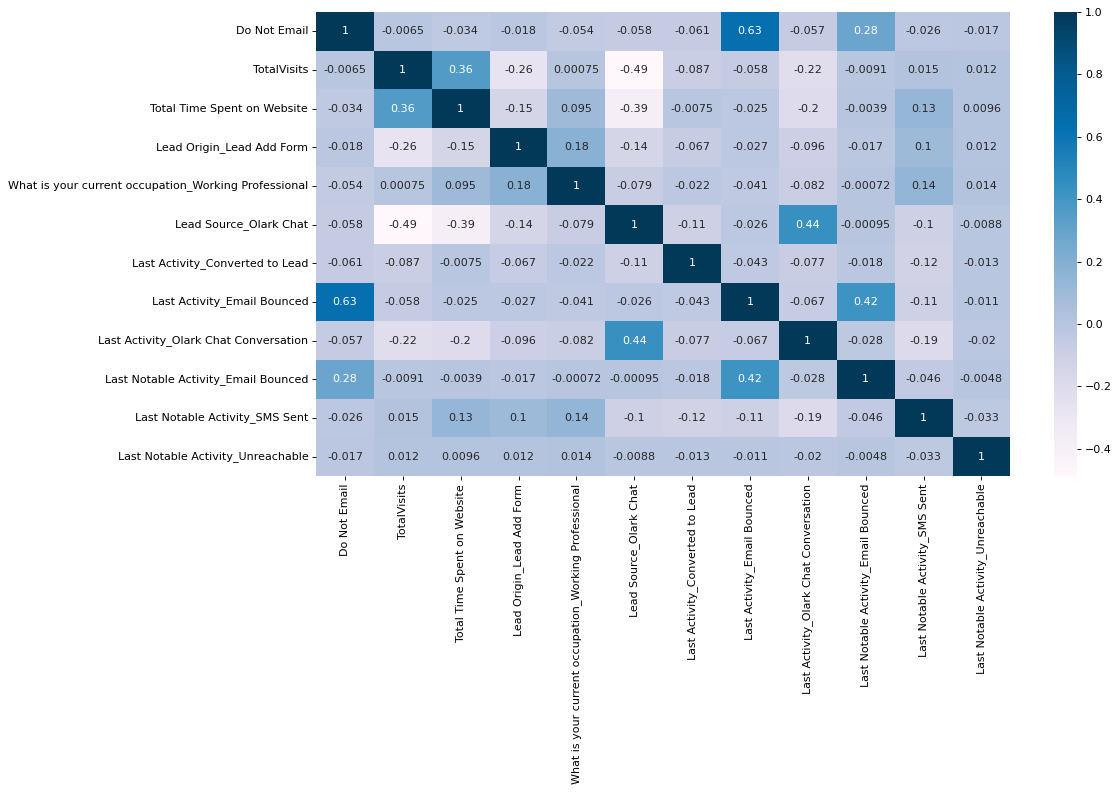

In [78]:
# Checking & Verifying & Validating Correlations Again:
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[col].corr()
sns.heatmap(corr, annot=True, cmap="PuBu")

plt.tight_layout()
plt.show()

#### Step 7: Model Prediction

In [79]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.83034765, 0.46789252, 0.77247255, 0.0874932 , 0.02904554,
       0.09765868, 0.95297523, 0.43458586, 0.84932748, 0.99792433])

In [80]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id
0          0        0.830348         2240
1          0        0.467893          113
2          1        0.772473         4132
3          0        0.087493         5573
4          0        0.029046         1109

In [81]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted
0          0        0.830348         2240          1
1          0        0.467893          113          0
2          1        0.772473         4132          1
3          0        0.087493         5573          0
4          0        0.029046         1109          0


#### step 8: Model Evaluation

In [82]:
# Checking the confusion metrics
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3390  468]
 [ 733 1729]]


In [83]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8099683544303797


In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7022745735174655

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.8786936236391913

In [88]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.12130637636080871


In [89]:
# positive predictive value 
print (TP / float(TP+FP))

0.7869822485207101


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8222168324035897


Our model seems to have high accuracy (80.99%), low sensitivity (68.80%) and high specificity (88.51%). We will indentify the customers which might convert, with the help of ROC Curves in the next section.

#### Step 9: Plotting ROC Curve

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

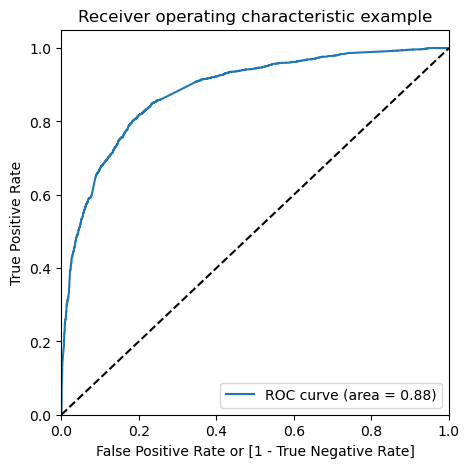

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is nearly equal to 1 which is quite good. so we seem to have a good model. Lets also check the sensitivity and specificity tradeoff to find the optimal cut off point.

#### Step 10: Finding Optimal Cutoff Point

In [95]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  lead_score_board  0.0  \
0          0        0.830348         2240          1                83    1   
1          0        0.467893          113          0                47    1   
2          1        0.772473         4132          1                77    1   
3          0        0.087493         5573          0                 9    1   
4          0        0.029046         1109          0                 3    1   

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1    1    1    1    0  
1    1    1    1    1    0    0    0    0    0  
2    1    1    1    1    1    1    1    0    0  
3    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0

In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_p = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_p.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_p)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.593513  0.969943  0.353292
0.2   0.2  0.740190  0.915922  0.628046
0.3   0.3  0.799367  0.840374  0.773199
0.4   0.4  0.810127  0.777823  0.830741
0.5   0.5  0.809968  0.702275  0.878694
0.6   0.6  0.795570  0.592201  0.925350
0.7   0.7  0.782437  0.518278  0.951011
0.8   0.8  0.764241  0.442323  0.969673
0.9   0.9  0.706171  0.263201  0.988854


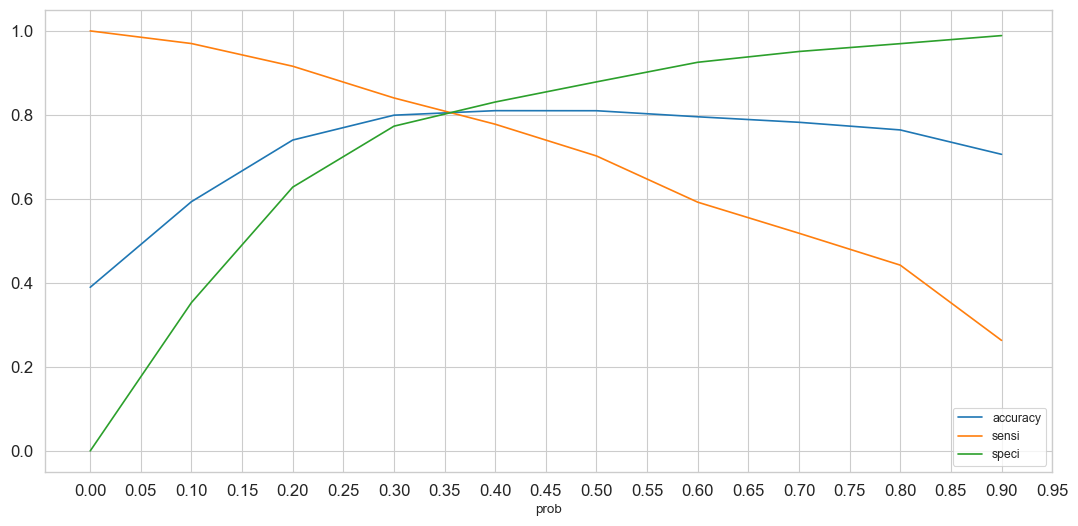

In [97]:
#Plotting Graph
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_p.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(13,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [98]:
# Evaluating the model with optimal probability cutoff as 0.34
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.34 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  lead_score_board  0.0  \
0          0        0.830348         2240          1                83    1   
1          0        0.467893          113          0                47    1   
2          1        0.772473         4132          1                77    1   
3          0        0.087493         5573          0                 9    1   
4          0        0.029046         1109          0                 3    1   

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    1    1    1    1    1    1    1    1    0                1  
1    1    1    1    1    0    0    0    0    0                1  
2    1    1    1    1    1    1    1    0    0                1  
3    0    0    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0    0    0                0

In [99]:
# Now let us calculate the lead score

y_train_pred_final['lead_score_board'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score_board']].head(10)


Converted  Converted_Prob  Prospect Id  final_Predicted  lead_score_board
0          0        0.830348         2240                1                83
1          0        0.467893          113                1                47
2          1        0.772473         4132                1                77
3          0        0.087493         5573                0                 9
4          0        0.029046         1109                0                 3
5          0        0.097659         2282                0                10
6          1        0.952975         2976                1                95
7          0        0.434586         8431                1                43
8          1        0.849327         2770                1                85
9          1        0.997924         5790                1               100

In [100]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8060126582278481


In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3081,  777],
       [ 449, 2013]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Sensitivity 
TP / float(TP+FN)

0.8176279447603574

In [103]:
# specificity
TN / float(TN+FP)

0.7986003110419907

In [104]:
# false postive rate
print(FP/ float(TN+FP))

0.20139968895800933


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7215053763440861


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8728045325779037


Accuracy : 80.33%

Sensitivity : 81.66%

Specificity : 79.50%

In [107]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3081,  777],
       [ 449, 2013]], dtype=int64)

In [108]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7215053763440861

In [109]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8176279447603574

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3858
           1       0.72      0.82      0.77      2462

    accuracy                           0.81      6320
   macro avg       0.80      0.81      0.80      6320
weighted avg       0.81      0.81      0.81      6320



In [111]:

F1 = 2*(pre*rec)/(pre+rec)
F1

0.7665651180502665

In [112]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

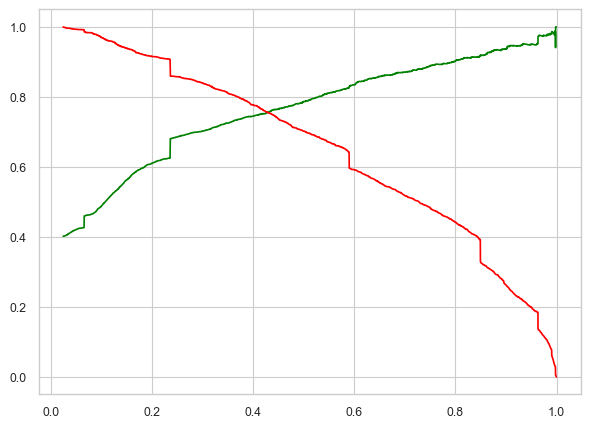

In [113]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making Predictions on test set

In [114]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [115]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
2296             0       0.1875                     0.665313   
8697             0       0.4375                     0.184032   
7378             0       0.1250                     0.163284   
8631             0       0.3125                     0.407307   
4799             0       0.5000                     0.744700   

      Lead Origin_Lead Add Form  \
2296                          0   
8697                          0   
7378                          0   
8631                          0   
4799                          0   

      What is your current occupation_Working Professional  \
2296                                                  0      
8697                                                  0      
7378                                                  0      
8631                                                  0      
4799                                                  0      

      Lead Source_Olark Chat  Last Activity_Converted to Lead  \
2296                       0                                0   
8697                       0                                0   
7378                       0                                0   
8631                       0                                0   
4799                       0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
2296                            0                                      0   
8697                            0                                      0   
7378                            0                                      0   
8631                            0                                      0   
4799                            0                                      0   

      Last Notable Activity_Email Bounced  Last Notable Activity_SMS Sent  \
2296                                    0                               1   
8697                                    0                               1   
7378                                    0                               0   
8631                                    0                               0   
4799                                    0                               1   

      Last Notable Activity_Unreachable  
2296                                  0  
8697                                  0  
7378                                  0  
8631                                  0  
4799                                  0

In [116]:

print(y_test.shape)
print(X_test.shape)

(2709,)
(2709, 12)


In [117]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [118]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2296    0.889950
8697    0.559900
7378    0.148281
8631    0.389229
4799    0.942695
4503    0.589773
7129    0.903729
1717    0.235780
8398    0.868804
5116    0.235780
dtype: float64

In [119]:

# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
2296  0.889950
8697  0.559900
7378  0.148281
8631  0.389229
4799  0.942695

In [120]:

# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [121]:

y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [122]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [124]:
# Checking the head() of the final dataframe
y_pred_final.head()

Converted  Prospect Id         0
0          1         2296  0.889950
1          0         8697  0.559900
2          0         7378  0.148281
3          0         8631  0.389229
4          1         4799  0.942695

In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [126]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  Prospect Id  Converted_Prob  Lead_Score_Board
0          1         2296        0.889950                89
1          0         8697        0.559900                56
2          0         7378        0.148281                15
3          0         8631        0.389229                39
4          1         4799        0.942695                94

In [127]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board
0         2296          1        0.889950                89
1         8697          0        0.559900                56
2         7378          0        0.148281                15
3         8631          0        0.389229                39
4         4799          1        0.942695                94

In [128]:

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         2296          1        0.889950                89                1
1         8697          0        0.559900                56                1
2         7378          0        0.148281                15                0
3         8631          0        0.389229                39                1
4         4799          1        0.942695                94                1

In [129]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.8058324104835732

In [130]:


confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1352,  342],
       [ 184,  831]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.81871921182266

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.7981109799291618

Accuracy: 80.36%

Sensitivity: 81.70%

Specificity: 79.48%

In [135]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7084398976982097

In [136]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.81871921182266

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20188902007083825


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7084398976982097


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8802083333333334


In [140]:
print(classification_report(y_pred_final["Converted"],y_pred_final["final_predicted"]))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1694
           1       0.71      0.82      0.76      1015

    accuracy                           0.81      2709
   macro avg       0.79      0.81      0.80      2709
weighted avg       0.82      0.81      0.81      2709



In [141]:

# Precision and Recall metrics for the test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision -  0.7084398976982097
Recall - 0.81871921182266


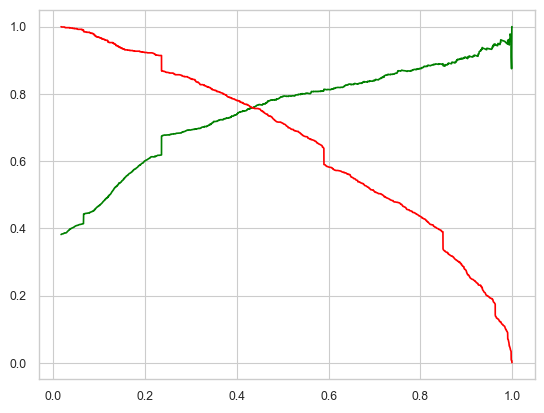

In [142]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [143]:
from sklearn.model_selection import cross_val_score

X=X_train[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7  0.75 0.75 0.75 0.75 0.75 0.8  0.85 0.85 0.9 ]
0.7849999999999999


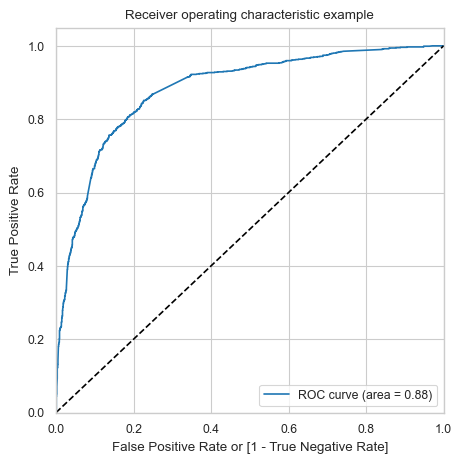

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])


Calculating the LEAD SCORE

In [145]:
#This needs to be calculated for all the leads from the original dataset (train + test)
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  Lead_Score_Board  final_predicted
0         2296          1        0.889950                89                1
1         8697          0        0.559900                56                1
2         7378          0        0.148281                15                0
3         8631          0        0.389229                39                1
4         4799          1        0.942695                94                1

In [146]:

# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Converted_Prob  Prospect Id  predicted  lead_score_board  0.0  \
0          0        0.830348         2240          1                83    1   
1          0        0.467893          113          0                47    1   
2          1        0.772473         4132          1                77    1   
3          0        0.087493         5573          0                 9    1   
4          0        0.029046         1109          0                 3    1   

   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    1    1    1    1    1    1    1    1    0                1  
1    1    1    1    1    0    0    0    0    0                1  
2    1    1    1    1    1    1    1    0    0                1  
3    0    0    0    0    0    0    0    0    0                0  
4    0    0    0    0    0    0    0    0    0                0

In [147]:

# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
leads_train_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted
0         2240          0        0.830348                1
1          113          0        0.467893                1
2         4132          1        0.772473                1
3         5573          0        0.087493                0
4         1109          0        0.029046                0

In [148]:

leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  final_predicted
0         2296          1        0.889950                1
1         8697          0        0.559900                1
2         7378          0        0.148281                0
3         8631          0        0.389229                1
4         4799          1        0.942695                1

In [149]:

# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted
0         2240          0        0.830348              1.0              NaN
1          113          0        0.467893              1.0              NaN
2         4132          1        0.772473              1.0              NaN
3         5573          0        0.087493              0.0              NaN
4         1109          0        0.029046              0.0              NaN

In [150]:

# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted  \
0         2240          0        0.830348              1.0              NaN   
1          113          0        0.467893              1.0              NaN   
2         4132          1        0.772473              1.0              NaN   
3         5573          0        0.087493              0.0              NaN   
4         1109          0        0.029046              0.0              NaN   

   Lead_Score  
0          83  
1          47  
2          77  
3           9  
4           3

In [151]:

# Inspecting the dataframe shape
lead_full_pred.shape


(9029, 6)

In [152]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
0                    0        0.235780              NaN              0.0   
1                    0        0.287219              0.0              NaN   
2                    1        0.644230              1.0              NaN   
3                    0        0.126330              NaN              0.0   
4                    1        0.349886              1.0              NaN   

             Lead_Score  
Prospect Id              
0                    24  
1                    29  
2                    64  
3                    13  
4                    35

Determining HOT LEADS with 89% accuracy more than 80% Conversion Rate

In [153]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
37                   1        0.855198              1.0              NaN   
64                   1        0.969226              NaN              1.0   
76                   1        0.871197              NaN              1.0   
77                   1        0.984293              1.0              NaN   
79                   1        0.998097              NaN              1.0   

             Lead_Score  
Prospect Id              
37                   86  
64                   97  
76                   87  
77                   98  
79                  100

In [154]:

# Hot Leads Shape
hot_leads.shape

(1684, 5)

Determining Feature Importance

In [156]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.12
TotalVisits                                             1.15
Total Time Spent on Website                             4.44
Lead Origin_Lead Add Form                               4.35
What is your current occupation_Working Professional    2.91
Lead Source_Olark Chat                                  1.44
Last Activity_Converted to Lead                        -1.01
Last Activity_Email Bounced                            -1.77
Last Activity_Olark Chat Conversation                  -1.48
Last Notable Activity_Email Bounced                     1.76
Last Notable Activity_SMS Sent                          1.54
Last Notable Activity_Unreachable                       1.32
dtype: float64

In [157]:

# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               97.92
What is your current occupation_Working Professional    65.51
Last Notable Activity_Email Bounced                     39.73
Last Notable Activity_SMS Sent                          34.68
Lead Source_Olark Chat                                  32.45
Last Notable Activity_Unreachable                       29.72
TotalVisits                                             25.80
Last Activity_Converted to Lead                        -22.65
Do Not Email                                           -25.31
Last Activity_Olark Chat Conversation                  -33.34
Last Activity_Email Bounced                            -39.85
dtype: float64

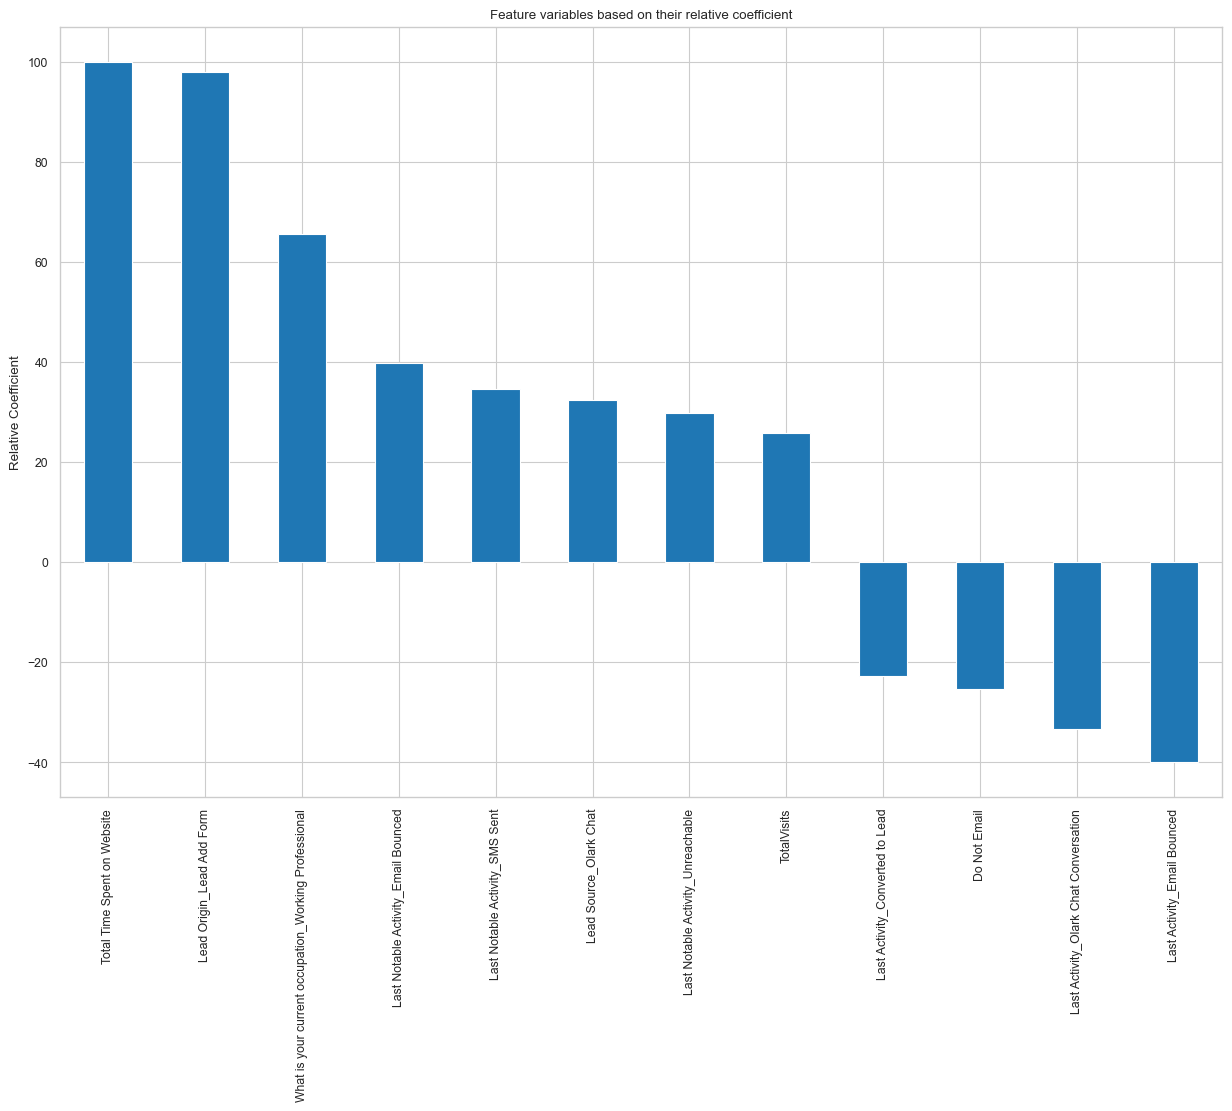

In [158]:

# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [159]:

# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
2                        Total Time Spent on Website 100.00
3                          Lead Origin_Lead Add Form  97.92
4  What is your current occupation_Working Profes...  65.51

In [160]:

# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

index      0
0                           Do Not Email -25.31
8  Last Activity_Olark Chat Conversation -33.34
7            Last Activity_Email Bounced -39.85

Final Summary:

So as we can see above the model seems to be performing well. The ROC curve has a value of 1, which is very good. Let us compare the values obtained for Train & Test Set:

Train Data: Accuracy : 80.33% Sensitivity : 81.66% Specificity : 79.50%

Test Data: Accuracy : 80.36% Sensitivity : 81.70% Specificity : 79.48%

CONCLUSION & RECOMMENDATIONS

After trying several models, we finally chose a model no 5 with the following characteristics:
All variables have p-value < 0.05, showing significant features contributing towards Lead Conversion.

All the features have very low VIF values, means hardly there is any muliticollinearity among the features. This can be seen from the heat map.

The ROC curve has a value of 1, which is very good!

The overall accuracy of Around 80% at a probability threshold of 0.34 on the test dataset is also very acceptable.

For Train Dataset

Accuracy : 80.33%
Sensitivity/Recall : 81.66%
Specificity : 79.50%
False positive rate - predicting the lead conversion when the lead does not convert: 0.20
Precision/Positive predictive value: 71.08%
Negative predictive value: 87.54%
ROC : 1
F1 Score : 0.76

For Test Dataset

Accuracy : 80.36%
Sensitivity/Recall : 81.70%
Specificity : 79.48%
False postive rate - predicting the lead conversion when the lead does not convert: 0.20
Precision/Positive predictive value: 72.10%
Negative predictive value: 87.00%
ROC : 1.0

The optimal threshold for the model is 0.34 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.

High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.